In [1]:
from matplotlib import pyplot as plt
import plotly.express as px
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import plotly.graph_objects as go
import pandas as pd

In [2]:
datos = pd.read_csv('datos.csv')
datos2 = pd.read_csv('datos2.csv')
seed = 42

X, y = datos.drop("Parar", axis="columns"), datos["Parar"]

In [4]:
def transform_status(status):
    status = str(status) 
    if '1' in status:
        return 1
    elif '4' in status:
        return 4
    elif '5' in status:
        return 5
    elif any(char in status for char in ['6', '7']):
        return 6
    else:
        return int(status)

X['TrackStatus'] = X['TrackStatus'].apply(transform_status).astype('int32')


In [5]:
v_continuas = ['Tiempo_Parada', 'Tiempo_Por_Vuelta', 'Curvas_Lentas', 'Curvas_Medias', 'Curvas_Rápidas', 
                            'Año', 'LapNumber', 'Stint', 'TyreLife', 'TrackStatus', 'Position', 'Tiempo_Antes_Pit', 
                            'Tiempo_Delante', 'Tiempo_Detras', 'TrackTemp']

v_discretas =  ['Evento','Deg_Blando','Deg_Medio','Deg_Duro','Driver','Compound','Team','Piloto_Delante',
                    'Piloto_Detras','Parada_Delante','Parada_Detras', 'Rainfall', 'Tráfico']
print("Variables continuas: ",len(v_continuas))
print("Variables discretas: ",len(v_discretas))

Variables continuas:  15
Variables discretas:  13


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed, stratify=y)
data_train = pd.concat([X_train, y_train], axis = 1)
data_test = pd.concat([X_test,y_test], axis=1)

In [7]:
X_train = data_train[data_train["Parar"] == "si"]
X_train = X_train.drop(["Parar"], axis=1).reset_index(drop=True)
X_test = data_test[data_test["Parar"] == "si"]
X_test = X_test.drop(["Parar"], axis=1).reset_index(drop=True)

In [9]:
X_train.describe()

,Tiempo_Parada,Tiempo_Por_Vuelta,Curvas_Lentas,Curvas_Medias,Curvas_Rápidas,Año,LapNumber,Stint,TyreLife,TrackStatus,Position,Tiempo_Antes_Pit,Tiempo_Delante,Tiempo_Detras,TrackTemp
count,3009.000000,3009.000000,3009.00000,3009.000000,3009.000000,3009.000000,3009.000000,3009.000000,3009.000000,3009.000000,3009.000000,3009.000000,3009.000000,3009.000000,3009.000000
mean,24.491725,93.386569,6.05118,7.460618,2.777335,2021.307411,25.539050,1.771353,17.652709,2.105018,10.051844,130.781519,9.463811,-17.632439,34.923164
std,3.334035,12.384772,3.07130,2.642708,2.548259,1.464864,16.457813,0.983016,10.888795,1.590239,5.748725,228.613645,145.172441,92.531386,9.248632
min,19.498540,73.066041,0.00000,0.000000,0.000000,2019.000000,1.000000,1.000000,1.000000,1.000000,1.000000,45.985000,-99.000000,-1932.190000,13.800000
25%,21.969218,85.590107,4.00000,6.000000,1.000000,2020.000000,12.000000,1.000000,9.000000,1.000000,5.000000,58.499000,1.145000,-10.843000,28.300000
50%,24.030967,89.599715,6.00000,8.000000,2.000000,2021.000000,24.000000,1.000000,17.000000,1.000000,10.000000,69.253000,2.958000,-3.818000,34.300000
75%,26.010261,101.351387,7.00000,9.000000,3.000000,2023.000000,38.000000,2.000000,25.000000,4.000000,15.000000,82.746000,8.041000,-1.459000,41.500000
max,33.272812,136.878923,13.00000,13.000000,11.000000,2024.000000,71.000000,7.000000,64.000000,6.000000,20.000000,999.000000,4730.376000,1982.481000,57.200000


In [10]:
X_test.describe()

,Tiempo_Parada,Tiempo_Por_Vuelta,Curvas_Lentas,Curvas_Medias,Curvas_Rápidas,Año,LapNumber,Stint,TyreLife,TrackStatus,Position,Tiempo_Antes_Pit,Tiempo_Delante,Tiempo_Detras,TrackTemp
count,752.000000,752.000000,752.000000,752.000000,752.000000,752.000000,752.000000,752.000000,752.000000,752.000000,752.000000,752.000000,752.000000,752.000000,752.000000
mean,24.469783,93.493103,6.119681,7.386968,2.663564,2021.323138,25.196809,1.712766,18.190160,2.078457,10.099734,142.811394,3.960690,-18.875906,34.960904
std,3.248000,12.656529,3.177658,2.587585,2.330222,1.496769,16.785752,0.937428,11.543342,1.590740,5.863462,248.372829,69.421529,92.110752,9.281908
min,19.498540,73.066041,0.000000,0.000000,0.000000,2019.000000,1.000000,1.000000,1.000000,1.000000,1.000000,44.653000,-99.000000,-2384.907000,13.900000
25%,21.969218,85.192011,4.000000,6.000000,1.000000,2020.000000,11.000000,1.000000,9.000000,1.000000,5.000000,58.468500,1.141750,-11.269750,28.800000
50%,24.030967,91.985336,6.000000,7.000000,2.000000,2021.000000,24.000000,1.000000,18.000000,1.000000,10.000000,69.677000,2.847000,-3.928000,34.150000
75%,26.010261,101.351387,8.000000,9.000000,3.000000,2023.000000,37.000000,2.000000,26.000000,4.000000,15.000000,82.804250,8.101000,-1.491750,41.000000
max,33.272812,136.878923,13.000000,13.000000,11.000000,2024.000000,70.000000,6.000000,58.000000,6.000000,20.000000,999.000000,1409.353000,129.289000,56.400000


In [7]:
columnas = datos2.columns.tolist()

columnas2 = columnas.copy()
columnas2 = columnas2.remove('CompuestoBueno')

X_train = X_train.merge(datos2[columnas], on=columnas2, how='inner')
X_test = X_test.merge(datos2[columnas], on=columnas2, how='inner')

frecuencia_valores = X_train["CompuestoBueno"].value_counts()
print(frecuencia_valores)

HARD            942
MEDIUM          888
SOFT            333
INTERMEDIATE    170
WET              19
UNKNOWN          10
Name: CompuestoBueno, dtype: int64


In [8]:
X_train = X_train[X_train['CompuestoBueno'] != 'UNKNOWN']
X_test = X_test[X_test['CompuestoBueno'] != 'UNKNOWN']

In [9]:
frecuencia_valores = X_train["CompuestoBueno"].value_counts()
print(frecuencia_valores)

HARD            942
MEDIUM          888
SOFT            333
INTERMEDIATE    170
WET              19
Name: CompuestoBueno, dtype: int64


In [10]:
y_train = X_train["CompuestoBueno"]
data_train = pd.concat([X_train, y_train], axis=1)
X_train = X_train.drop("CompuestoBueno", axis=1)

y_test = X_test["CompuestoBueno"]
data_test = pd.concat([X_test, y_test], axis=1)
X_test = X_test.drop("CompuestoBueno", axis=1)

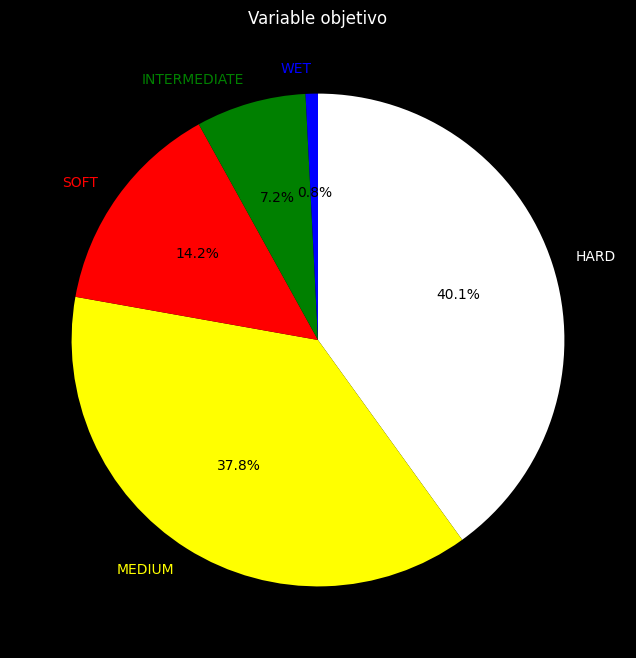

In [11]:
porcentajes = y_train.value_counts(normalize=True) * 100

colores = {'WET': 'blue', 'INTERMEDIATE': 'green', 'SOFT': 'red', 'MEDIUM': 'yellow', 'HARD': 'white'}

plt.figure(figsize=(8, 8), facecolor='black')
patches, labels, autotexts = plt.pie(porcentajes, labels=porcentajes.index, autopct='%1.1f%%', startangle=90, counterclock=False, colors=[colores[categoria] for categoria in porcentajes.index])

for i, text in enumerate(labels):
    text.set_color(colores[porcentajes.index[i]]) 
for autotext in autotexts:
    autotext.set_color('black')

plt.title('Variable objetivo', color='white') 

plt.show()

In [12]:
v_continuas = ['Tiempo_Parada', 'Tiempo_Por_Vuelta', 'Curvas_Lentas', 'Curvas_Medias', 'Curvas_Rápidas', 
                            'Año', 'LapNumber', 'Stint', 'TyreLife', 'TrackStatus', 'Position', 'Tiempo_Antes_Pit', 
                            'Tiempo_Delante', 'Tiempo_Detras', 'TrackTemp']

v_discretas =  ['Evento','Deg_Blando','Deg_Medio','Deg_Duro','Driver','Compound','Team','Piloto_Delante',
                    'Piloto_Detras','Parada_Delante','Parada_Detras', 'Rainfall', 'Tráfico']
print("Variables continuas: ",len(v_continuas))
print("Variables discretas: ",len(v_discretas))

Variables continuas:  15
Variables discretas:  13


# Análisis variables continuas

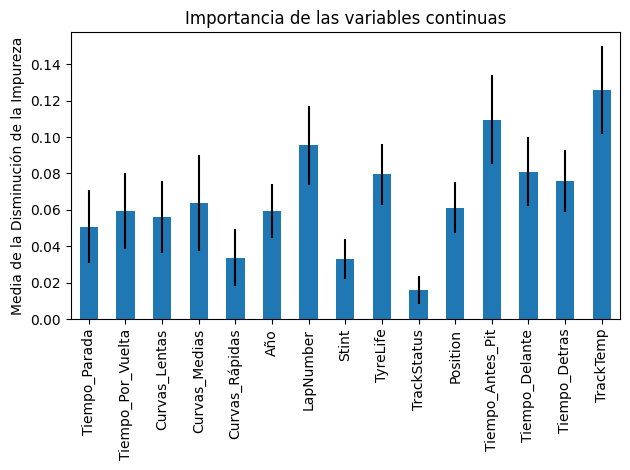

In [13]:
muestra_data = data_train.sample(1000, random_state=seed)

forest = RandomForestClassifier(random_state=seed)
forest.fit(muestra_data[v_continuas], muestra_data["CompuestoBueno"])
forest_importances = pd.Series(forest.feature_importances_, index=v_continuas)
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Importancia de las variables continuas")
ax.set_ylabel("Media de la Disminución de la Impureza")
fig.tight_layout()

# Análisis univariado

In [14]:
data_subset = pd.concat([X_train[v_continuas], y_train], axis=1)

colores = {'WET': 'blue', 'INTERMEDIATE': 'green', 'SOFT': 'red', 'MEDIUM': 'yellow', 'HARD': 'white'}

for col in v_continuas:
    fig = px.histogram(data_subset, x=col, color='CompuestoBueno', nbins=30, title=col, marginal='box', color_discrete_map=colores)
    fig.update_layout(
        plot_bgcolor='black',
        paper_bgcolor='black', 
        font_color='white'  
    )
    fig.show()

# Análisis multivariado

In [15]:
fig = px.imshow(X_train[v_continuas].corr(), x=X_train[v_continuas].columns, y=X_train[v_continuas].columns, color_continuous_scale='Viridis')
fig.update_layout(
        plot_bgcolor='black',
        paper_bgcolor='black', 
        font_color='white'  
)
fig.show()

In [16]:
data_subset = pd.concat([X_train[v_discretas], y_train], axis=1)

colores = {'WET': 'blue', 'INTERMEDIATE': 'green', 'SOFT': 'red', 'MEDIUM': 'yellow', 'HARD': 'white'}

for col in v_discretas:
    df_percent = data_subset.groupby([col, 'CompuestoBueno']).size().reset_index(name='count')
    df_percent['percentage'] = df_percent.groupby(col)['count'].transform(lambda x: x / x.sum() * 100)
    df_percent = df_percent.sort_values(by=['CompuestoBueno', 'percentage'], ascending=[True, False])

    fig = go.Figure()

    for class_val in df_percent['CompuestoBueno'].unique():
        df_class = df_percent[df_percent['CompuestoBueno'] == class_val]
        fig.add_trace(go.Bar(x=df_class[col], y=df_class['percentage'], name=class_val, marker_color=colores[class_val]))

    fig.update_layout(
        plot_bgcolor='black',
        paper_bgcolor='black',
        font_color='white'
    )

    fig.update_layout(barmode='stack', title=col, xaxis_title=col, yaxis_title='Porcentaje')
    fig.show()